In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [34]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\kasia\AppData\Local\Temp\ipykernel_13088\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [36]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [37]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.

#checking the most recent date
#recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()


recent_date = session.query(func.max(measurement.date)).scalar()
print(recent_date)


2017-08-23


<function matplotlib.pyplot.show(close=None, block=None)>

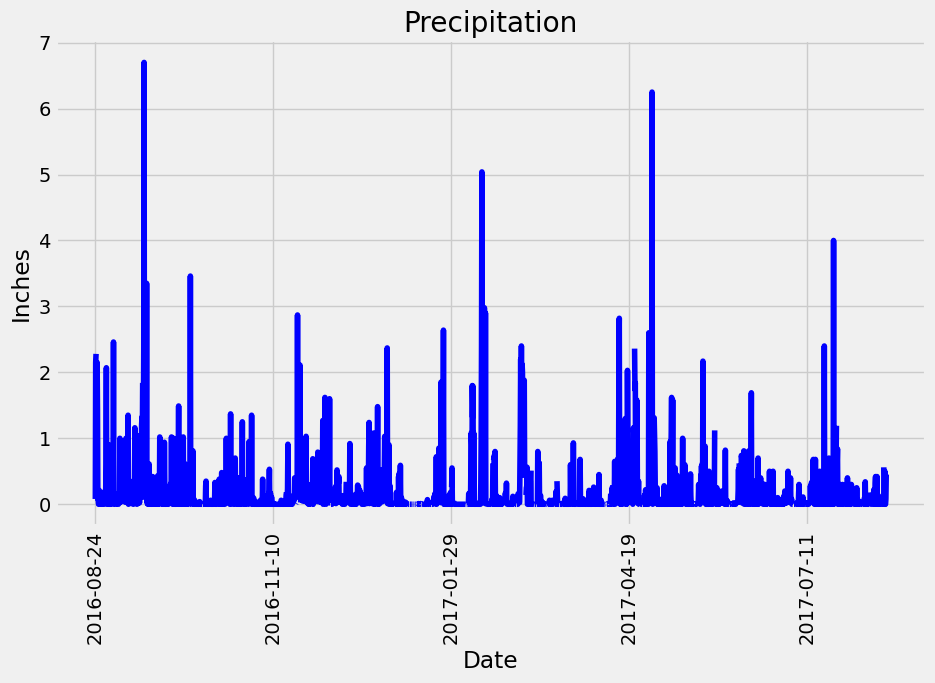

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_before = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_date = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_before).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_frame = pd.DataFrame(prcp_date, columns=['date', 'precipitation'])
data_frame.set_index('date', inplace=True)

# Sort the dataframe by date
data_frame.sort_index(inplace=True)
#checking the data frame
#data_frame.head(10)

# Use Pandas Plotting with Matplotlib to plot the data
figure1 = data_frame.plot(color="blue", figsize=(10,6), legend=False)
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show



In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_frame.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [42]:
# Design a query to calculate the total number of stations in the dataset
#number_of_stations = session.query(func.count(func.distinct(measurement.station))).scalar()
number_of_stations = session.query(func.count(func.distinct(station.station))).scalar()
number_of_stations

9

In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count()).\
                        group_by(measurement.station).\
                        order_by(func.count().desc()).all()

#alternatively print the result in more oganised form
#for station, count in most_active_stations:
  #  print(f"{station}, Count: {count}")
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
              filter(measurement.station == "USC00519281").all()
temperature

[(54.0, 85.0, 71.66378066378067)]

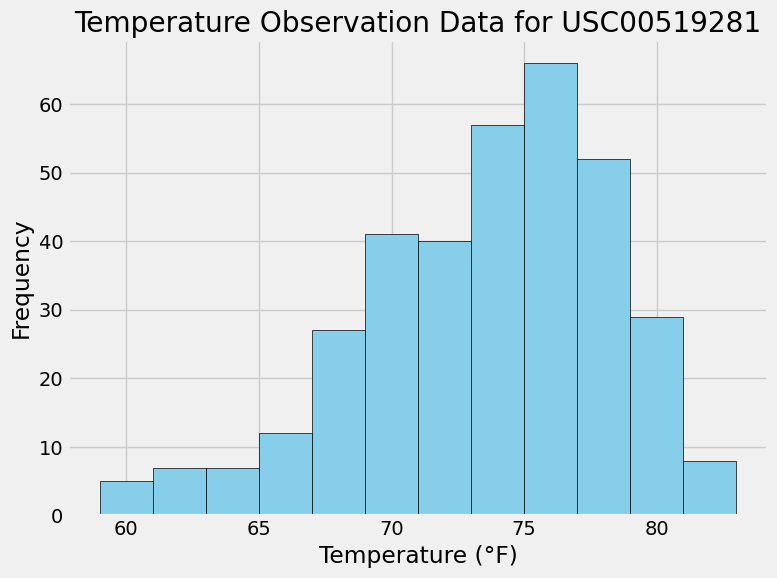

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures_mas = session.query(measurement.tobs).filter(measurement.station == "USC00519281").filter(measurement.date >= year_before).all()

# extracting TOBs from the query results
temperatures = [temp[0] for temp in temperatures_mas]

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, color="skyblue", edgecolor="black")
plt.title("Temperature Observation Data for USC00519281")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Close Session

In [53]:
# Close Session
session.close()